# Name: Prashant Puri


# I'd: 2059631

# Predicting the power in Combined Cycle Power Plant with linear regression

The CPPP(Combined Cycle Power Plant) is composed of gas turbine and steam turbine.Gas turbine compresses the air and mixes it with fuel, which is then ignited to spin a blade. The spinning energy is converted to electricity. Heat recovery steam generator captures the exhaust heat from gas turbine and generates steam. The steam is delivered to steam turbine to generate more electricity by spinning it's blade.It is important to predict the output of power plant in order to maximize the profit by selling the elctricity to as many customers as possible with already predicted amount of electricity.The dataset are collected from a Combined Cycle Power plant from 2006 to 2011,when the poer plant was set to run with full load.The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant. In this project, multi linear regression would be performed to predict the electrical output using four inputs.

We will be using the dataset provided by Pinar Tufekci which is available at the UCI Machine Learning repository. The dataset was collected over a six-year period and it is composed of 9568 data points collected when the power plant was set to work with a full load.

# 1. Exploratory Data Analysis

First, we will load the data after importing all the python libraries that we would need.

In [81]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Importing Data

The dataset consists of 4 hourly average variables or features and the target variable which is the Output Power (PE).

1. Ambient Temperature (AT) in the range 1.81°C and 37.11°C

2. Ambient Pressure (AP) in the range 992.89–1033.30 millibar

3. Relative Humidity (RH) in the range of 25.56% to 100.16%

4. Exhaust Vacuum (V) in the range 25.36–81.56 cm Hg

5. Net hourly electrical energy output (PE) 420.26–495.76 MW

In [47]:
#importing dataset
data_df = pd.read_csv('MLRPractice.csv')
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Datatypes

All input and output data contain numerical value.

In [48]:
print(data_df.columns)
print(data_df.dtypes)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object


In [49]:
#Next, we explore the data to get a feel of it.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


We can see that this dataset consists of 5 numerical variables (float64). There are no missing values (9568 non-null) across all the variables and the data type (dtypes) is a float point number. This is certainly good news, as we have a clean dataset.

In [50]:
#Next, we look at the distribution of the dataset
data_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Now, that we have had a feel of our dataset, we need to determine which features will help us predict the output power. Because the goal of regression is to create a mathematical model from the features to predict the target variable (PE), we need to ensure that we select features that have a strong correlation (high predictive power) with the target. A correlation matrix would be useful in doing this.

# Input data range

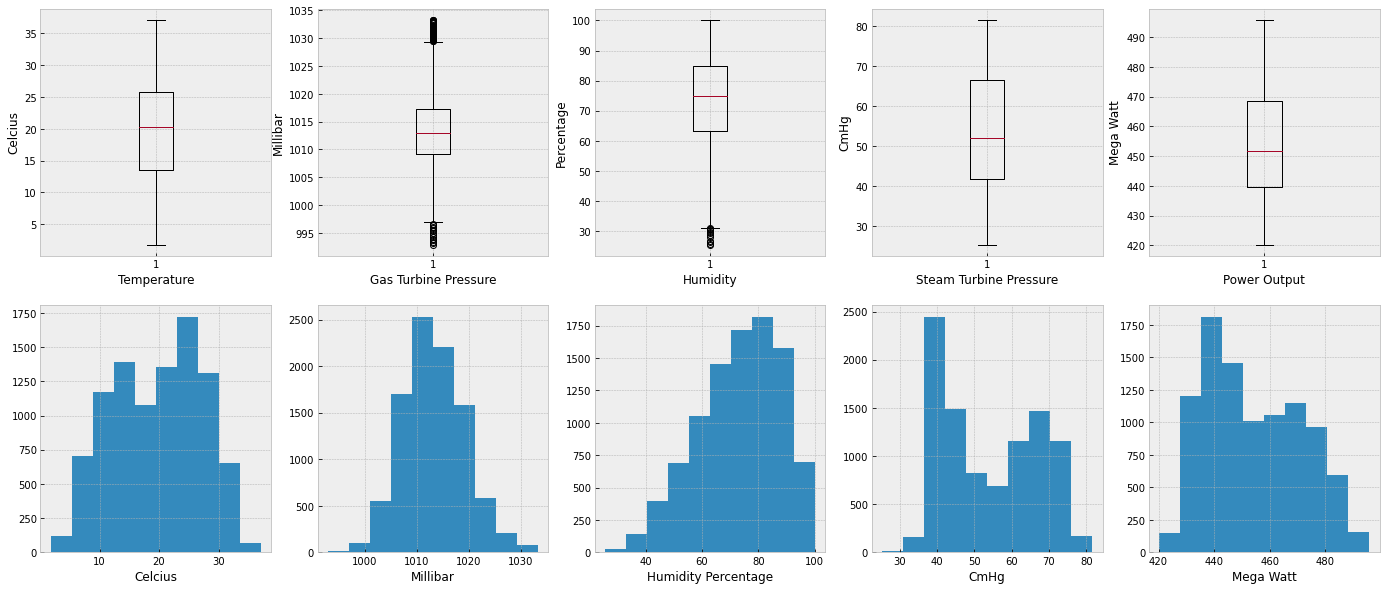

In [51]:
fig,axes = plt.subplots(nrows=2 , ncols=5 , figsize=(24,10))
axes[0,0].boxplot(data_df.AT)
axes[0,0].set_xlabel('Temperature')
axes[0,0].set_ylabel('Celcius')

axes[0,1].boxplot(data_df.AP)
axes[0,1].set_xlabel('Gas Turbine Pressure')
axes[0,1].set_ylabel('Millibar')

axes[0,2].boxplot(data_df.RH)
axes[0,2].set_xlabel('Humidity')
axes[0,2].set_ylabel('Percentage');

axes[0,3].boxplot(data_df.V)
axes[0,3].set_xlabel('Steam Turbine Pressure')
axes[0,3].set_ylabel('CmHg')

axes[0,4].boxplot(data_df.PE)
axes[0,4].set_xlabel('Power Output')
axes[0,4].set_ylabel('Mega Watt')

axes[1,0].hist(data_df.AT)
axes[1,0].set_xlabel('Celcius')

axes[1,1].hist(data_df.AP)
axes[1,1].set_xlabel('Millibar')

axes[1,2].hist(data_df.RH)
axes[1,2].set_xlabel('Humidity Percentage')

axes[1,3].hist(data_df.V)
axes[1,3].set_xlabel('CmHg')

axes[1,4].hist(data_df.PE)
axes[1,4].set_xlabel('Mega Watt')

plt.show();

The whiskers in boxplot represent 1.5 times interquartile range. One interesting thing to point out is that gas turbine pressure has smaller version comparing to the other inputs. In gas turbine pressure plot, there are many outliers because most of the data are concentrated on small interquartile range. Perhaps it is easier to control than other ones.

# Data Validity check

During data validity check, invalid data should be dropped. However no entries are dropped. Therefore there are no invalid or missing values in the original dataset.

In [52]:
data_df.PE = pd.to_numeric(data_df.PE, errors='coerce')
data_df.AT = pd.to_numeric(data_df.AT, errors='coerce')
data_df.V = pd.to_numeric(data_df.V, errors='coerce')
data_df.AP = pd.to_numeric(data_df.AP, errors='coerce')
data_df.RH = pd.to_numeric(data_df.RH, errors='coerce')
data_df = data_df.dropna(axis=0)
data_df.describe(include='all')

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# 2.Visualisation

# Relationship between data

We can obtain a first impression of the dependency between variables by examining a multidimensional scatterplot.

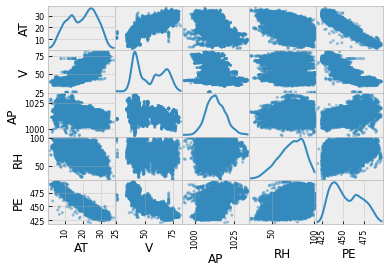

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_df, diagonal="kde");

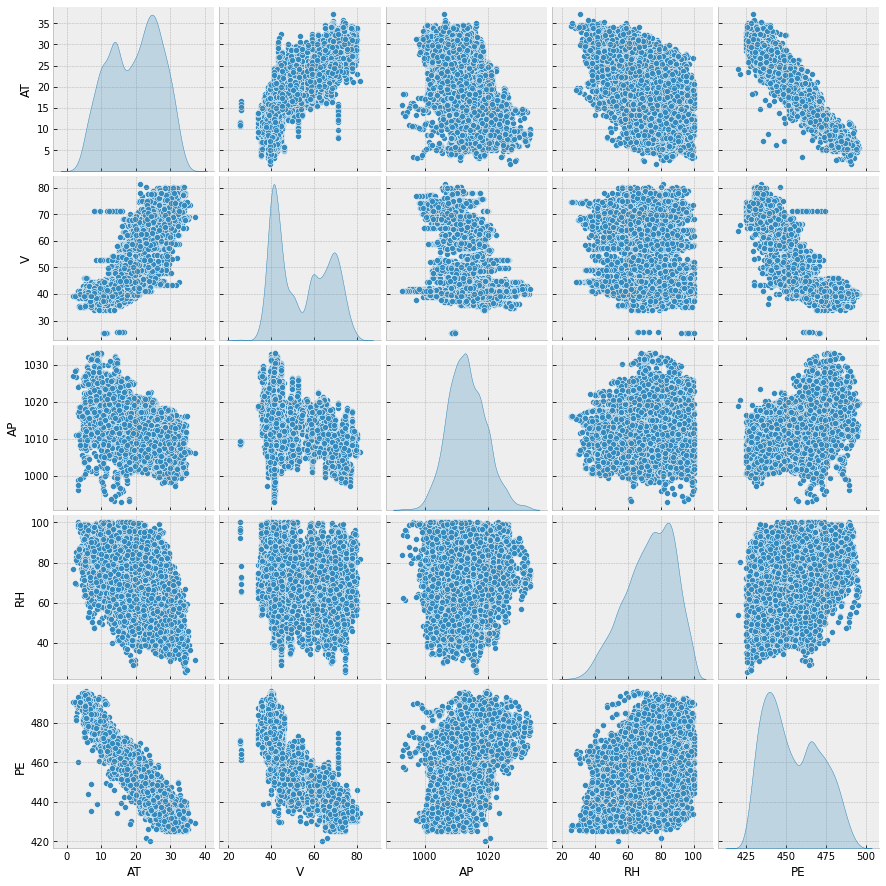

In [54]:
sns.pairplot(data_df, diag_kind='kde')

In this matrix, the diagonal contains a plot of the distribution of each variable. We observe that:

1. There is an approximately linear relationship between PE and the negative of AT.

2. There is an approximately linear relationship between PE and negative of V.

Strong positive relation is observed in Temperature-Steam turbine pressure. Strong negative relation is observed in Steam-turbine pressure-Output Power and Temperature-Output power.

We can also generate a 3D plot of the observations, which can sometimes help to interpret the data more easily. Here we plot PE as a function of AT and V.

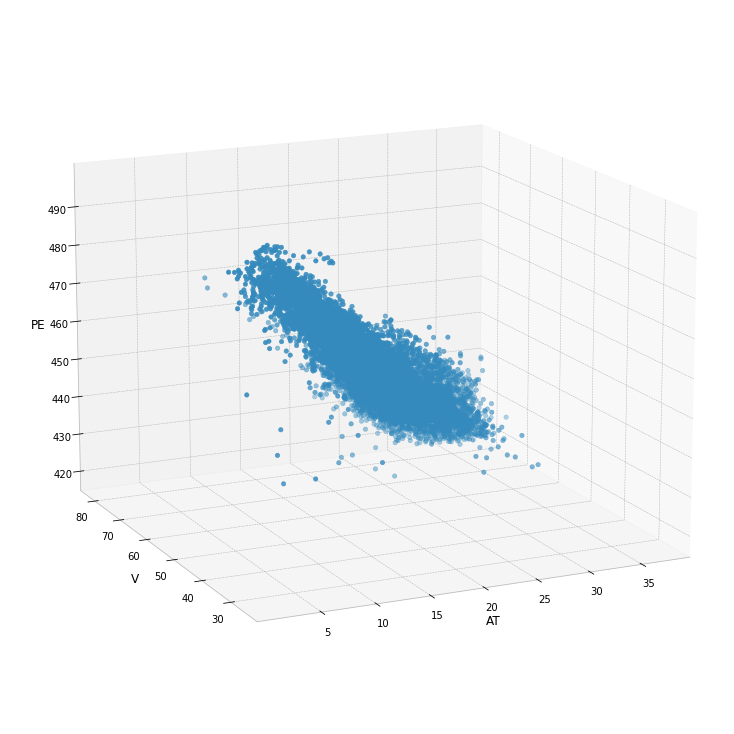

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(data_df["AT"], data_df["V"], data_df["PE"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

A correlation matrix is a structured approach to ranking the importance of predictors or input variables (input variables that have the most impact) on the output. To do this we plot the heatmap of the correlation matrix using Seaborn.

In [56]:
data_df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<AxesSubplot:>

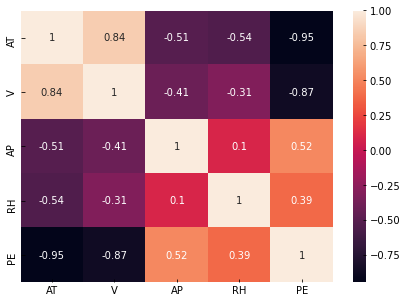

In [57]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(data_df.corr(), annot = True)

Correlation is measured on a scale of -1 to 1. -1 means complete negative correlation and 1 means complete positive correlation. 0 means no correlation at all.

From the correlation matrix, we can see that AT and V have a strong negative correlation with the target variable (PE) as their correlation coefficients are -0.95 and -0.87 respectively. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.52 and 0.39.

# 3. Prediction

We will created a fitted linear model using the formula API of the statsmodels library. We use all the observations except for PE as predictor variables in the multiple linear regression.

In [58]:
import statsmodels.formula.api as smf

lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=data_df).fit()
lm.params

Intercept    454.609274
AT            -1.977513
V             -0.233916
AP             0.062083
RH            -0.158054
dtype: float64

This means that the best formula to estimate output power as a function of AT, V, AP and RH is

                   PE = 451 . 067793 − 1 . 974731 AT − 0 . 234992 V + 0 . 065540 AP − 0 . 157598 RH
                   
For any particular observation (values for the predictor variables), we can use the linear model to estimate the output variable PE.

In [59]:
lm.predict(pd.DataFrame({"AT": [9.48], "V": [44.71], "AP": [1019.12], "RH": [66.43]}))

0    478.174482
dtype: float64

The predicted output power for this combination of inputs is 478 MW

# 4. Residuals plots


We check the residuals of each predictor variable for any pattern that might indicate that a linear model is not appropriate for this dataset.

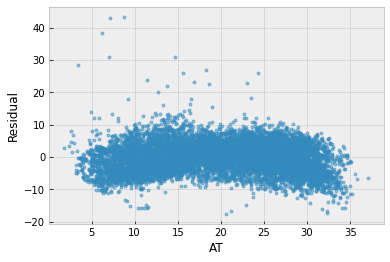

In [60]:
residuals = lm.predict(data_df) - data_df.PE
plt.plot(data_df.AT, residuals, ".", alpha=0.5)
plt.xlabel("AT")
plt.ylabel("Residual");

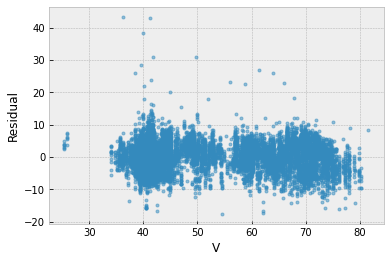

In [61]:
plt.plot(data_df.V, residuals, ".", alpha=0.5)
plt.xlabel("V")
plt.ylabel("Residual");

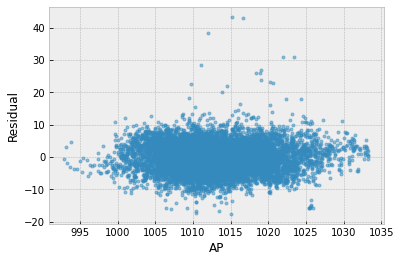

In [62]:
plt.plot(data_df.AP, residuals, ".", alpha=0.5)
plt.xlabel("AP")
plt.ylabel("Residual");

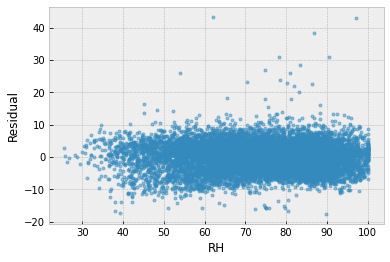

In [63]:
plt.plot(data_df.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");

Indeed, except for a minor quadratic shape to the residuals of variable AT (which we will ignore here), the residuals look random, without any systematic feature apparent that might indicate that our linear model is not appropriate for this data.

We also check that the variance of the residuals is normally distributed by plotting a histogram or a QQ plot of the residuals, as shown below.

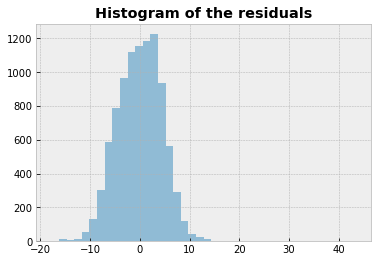

In [64]:
plt.hist(residuals, bins=40, alpha=0.5)
plt.title("Histogram of the residuals", weight="bold");

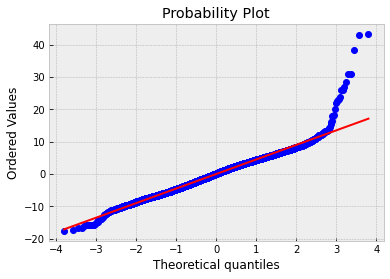

In [65]:
scipy.stats.probplot(residuals, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111));

# 5. Goodness of fit

In [66]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:26:00   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R^2R 
2
  for this model is 0.929, which means that it explains roughly 93% of the variance of the output power. 
  
  Interpretation of this number is dependent on the application (for instance, models used to understand health effects tend to   have lower R^2R 
2
  values than those used for physical models), but is quite satisfactory for this application.

# 6. Leverage

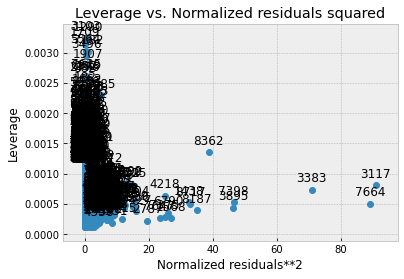

In [67]:
sm.graphics.plot_leverage_resid2(lm, alpha=0.05);

# 7. Identify and Clean

The leverage vs normal plot indicates that some row have small leverage with high residuals.

In [68]:
Outliers = [3382,3383,3884,3116,3117,3118,7663,7664,7665]
data_df.loc[Outliers]

,AT,V,AP,RH,PE
3382,25.34,49.50,1013.25,50.80,457.12
3383,6.22,39.85,1012.05,86.88,443.73
3884,30.75,73.50,1011.02,54.76,429.18
3116,14.86,44.71,1018.30,49.46,466.38
3117,8.74,36.30,1015.18,61.97,438.63
3118,16.55,46.18,1009.97,96.54,455.80
7663,19.31,43.56,1013.65,41.54,463.35
7664,7.14,41.22,1016.60,97.09,435.58
7665,28.18,71.14,1011.56,48.03,432.72


Sudden temperature drop is observed in the outliers.After the outliers are dropped, R^2 value is improved.

In [69]:
Outliers=[3383,3117,7664]
data_df_Filter = data_df.drop(Outliers)

In [70]:
smf.ols(formula = 'PE ~ AT*AP*RH*V', data= data_df_Filter).fit().rsquared

0.9396339170850277

# 8. Linear Regression

Define x and y

In [71]:
x=data_df.drop(['PE'],axis=1).values

y=data_df['PE'].values

In [72]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [73]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


Split the dataset in training set and test set

In [74]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Train the model on the training set

In [75]:
from sklearn.linear_model import LinearRegression

ml=LinearRegression()

ml.fit(x_train,y_train)

LinearRegression()

Predicting the test set results

In [76]:
y_pred=ml.predict(x_test)

print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [77]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

Evaluate the model

In [78]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9304112159477683

Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

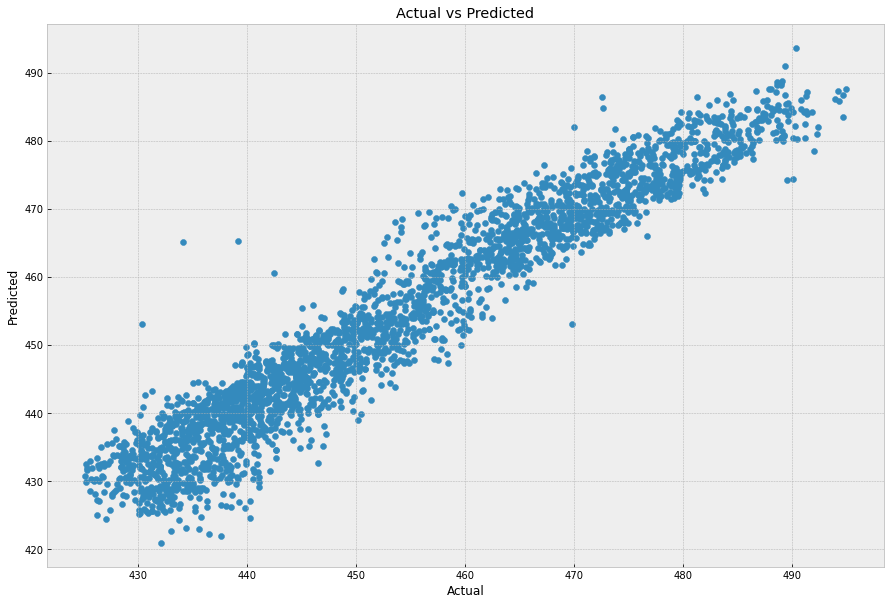

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Predicted values

In [80]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred,'Difference': y_test-y_pred})

pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396


# Summary

Our model have accurately labeled 93% of the test data.  This is just the beginning however. I could try to increase the accuracy even higher by using a different algorithm other than the linear regression, or try my model with different set of variables. There are defintely many more things that could be done to modify my model, but I will conclude this report here for now.